# **Case 1: Reformulation based on Short Sentence Transformer Embedding**

Based on toy examples: "Toyota" and "Toyota Camry" ("Specification" reformulation)

# 1. Import required libraries

In [1]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import SentenceTransformer
import random
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# 2. Define query simlarity calculation function and test with toy examples
Cosine similarity: -1 to 1 <br>

*   1: similar <br>
*   0: no relationshiip <br>
*   -1: dissimilar (opposite)  <br>

Edit distance based similarity: 0 to 1 <br>
*   1: similar <br>
*   0: no relationship <br>


In [2]:
##### Cosine Similarity based on sentence transformer embeddings

### Query reformulation based on sentence transformer embeddings
def calculate_query_similarity(query1, query2, threshold=0.6):
    # Load the sentence transformer model
    model = SentenceTransformer('all-MiniLM-L6-v2')

    # Encode the queries
    query1_embedding = model.encode([query1])
    query2_embedding = model.encode([query2])

    # Calculate cosine similarity
    similarity = cosine_similarity(query1_embedding, query2_embedding)[0][0]

    # Judge if query2 is a reformulation of query1
    is_reformulation = similarity >= threshold

    return similarity, is_reformulation

In [3]:
# Test the function: Not reformulation
query1 = "picture quality"
query2 = "automobile quality"

similarity_score, is_reformulation = calculate_query_similarity(query1, query2)

print(f"Query 1: {query1}")
print(f"Query 2: {query2}")
print(f"Similarity Score: {similarity_score:.4f}")
print(f"Is Query 2 a reformulation of Query 1? {is_reformulation}")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Query 1: picture quality
Query 2: automobile quality
Similarity Score: 0.4406
Is Query 2 a reformulation of Query 1? False


In [16]:
# Test the function: Query Reformulation
query1 = "Toyota"
query2 = "Toyota Camry"

similarity_score, is_reformulation = calculate_query_similarity(query1, query2, 0.6)

print(f"Query 1: {query1}")
print(f"Query 2: {query2}")
print(f"Similarity Score: {similarity_score:.4f}")
print(f"Is Query 2 a reformulation of Query 1? {is_reformulation}")

Query 1: Toyota
Query 2: Toyota Camry
Similarity Score: 0.8135
Is Query 2 a reformulation of Query 1? True


In [15]:
def edit_distance(query1: str, query2: str) -> int:
    """
    Calculate the Levenshtein edit distance between two strings.

    :param query1: First string
    :param query2: Second string
    :return: Edit distance (integer)
    """
    m, n = len(query1), len(query2)

    # Create a 2D array to store distances
    dp = [[0] * (n + 1) for _ in range(m + 1)]

    # Initialize base cases
    for i in range(m + 1):
        dp[i][0] = i  # Deletions
    for j in range(n + 1):
        dp[0][j] = j  # Insertions

    # Compute edit distance
    for i in range(1, m + 1):
        for j in range(1, n + 1):
            if query1[i - 1] == query2[j - 1]:
                dp[i][j] = dp[i - 1][j - 1]  # No change needed
            else:
                dp[i][j] = min(
                    dp[i - 1][j] + 1,    # Deletion
                    dp[i][j - 1] + 1,    # Insertion
                    dp[i - 1][j - 1] + 1 # Substitution
                )

    return dp[m][n]

def edit_distance_query_similarity(query1: str, query2: str, threshold = 0.6) -> float:
    """
    Compute similarity score between two queries based on edit distance.

    :param query1: First query string
    :param query2: Second query string
    :return: Similarity score between 0 and 1
    """
    # Compute edit distance
    distance = edit_distance(query1, query2)

    # Normalize similarity score
    max_len = max(len(query1), len(query2))

    # Avoid division by zero for empty strings
    if max_len == 0:
        return 1.0 if distance == 0 else 0.0

    similarity = 1 - (distance / max_len)

    # Judge if query2 is a reformulation of query1
    is_reformulation = similarity >= threshold

    return similarity, is_reformulation


In [17]:
# Example usage: Semantic reformulation
query1 = "fast food"
query2 = "quick meal"

cosine_similarity_score, is_reformulation_cosine = calculate_query_similarity(query1, query2, 0.6)  # Calculate cosine similarity
edit_distance_score, is_reformulation_edit = edit_distance_query_similarity(query1, query2, 0.6)  # Calculate edit distance similarity

print(f"Query 1: {query1}")
print(f"Query 2: {query2}")

print(f"Cosine Similarity Score: {cosine_similarity_score:.4f}")
print(f"Is Query 2 a reformulation of Query 1? {is_reformulation_cosine}")

print(f"Edit Distnce Similarity Score: {edit_distance_score:.4f}")
print(f"Is Query 2 a reformulation of Query 1? {is_reformulation_edit}")


Query 1: fast food
Query 2: quick meal
Cosine Similarity Score: 0.6998
Is Query 2 a reformulation of Query 1? True
Edit Distnce Similarity Score: 0.1000
Is Query 2 a reformulation of Query 1? False


In [24]:
# Example query pairs
query_pairs = [
    ("hello", "helo"),               # Minor typo
    ("good morning", "morning good"), # Word order change
    ("car rental", "rent a car"),    # Semantic similarity but different words
    ("buy laptop", "purchase notebook"), # Synonyms
    ("data science", "machine learning"), # Related but different fields
    ("how to cook pasta", "pasta cooking instructions"), # Different phrasing
    ("AI technology", "artificial intelligence"), # Expanded abbreviation
    ("fast food", "quick meal"), # Different wording, same meaning
    ("cheap flights", "low-cost airline tickets"), # Paraphrased
    ("weather today", "current weather forecast"), # Different structure

]

print("Similarity scores based on edit distance")

# Compute edit distance similarity for each pair (old reformulation metric)
for q1, q2 in query_pairs:
    similarity, is_reformulation = edit_distance_query_similarity(q1, q2, 0.6)
    print(f"Query1: {q1}, Query2: {q2}, Similarity: {similarity:.3f}, Is_Reformulation: {is_reformulation}")

Similarity scores based on edit distance
Query1: hello, Query2: helo, Similarity: 0.800, Is_Reformulation: True
Query1: good morning, Query2: morning good, Similarity: 0.167, Is_Reformulation: False
Query1: car rental, Query2: rent a car, Similarity: 0.100, Is_Reformulation: False
Query1: buy laptop, Query2: purchase notebook, Similarity: 0.235, Is_Reformulation: False
Query1: data science, Query2: machine learning, Similarity: 0.188, Is_Reformulation: False
Query1: how to cook pasta, Query2: pasta cooking instructions, Similarity: 0.308, Is_Reformulation: False
Query1: AI technology, Query2: artificial intelligence, Similarity: 0.174, Is_Reformulation: False
Query1: fast food, Query2: quick meal, Similarity: 0.100, Is_Reformulation: False
Query1: cheap flights, Query2: low-cost airline tickets, Similarity: 0.208, Is_Reformulation: False
Query1: weather today, Query2: current weather forecast, Similarity: 0.417, Is_Reformulation: False


Edit distance captures typos well, but fails with word reordering and semantic reformulation

In [27]:
# Compute semantic similarity for each pair baesd on transformer embedding (new embedding-based reformulation metric)

print("Similarity scores based on transfomer sentence embedding")

for q1, q2 in query_pairs:
    similarity_score, is_reformulation = calculate_query_similarity(q1, q2, 0.6)
    print(f"Query1: {q1}, Query2: {q2}, Similarity: {similarity_score:.3f}, Is_Reformulation: {is_reformulation}")

Similarity scores based on transfomer sentence embedding
Query1: hello, Query2: helo, Similarity: 0.330, Is_Reformulation: False
Query1: good morning, Query2: morning good, Similarity: 0.863, Is_Reformulation: True
Query1: car rental, Query2: rent a car, Similarity: 0.833, Is_Reformulation: True
Query1: buy laptop, Query2: purchase notebook, Similarity: 0.733, Is_Reformulation: True
Query1: data science, Query2: machine learning, Similarity: 0.532, Is_Reformulation: False
Query1: how to cook pasta, Query2: pasta cooking instructions, Similarity: 0.899, Is_Reformulation: True
Query1: AI technology, Query2: artificial intelligence, Similarity: 0.788, Is_Reformulation: True
Query1: fast food, Query2: quick meal, Similarity: 0.700, Is_Reformulation: True
Query1: cheap flights, Query2: low-cost airline tickets, Similarity: 0.787, Is_Reformulation: True
Query1: weather today, Query2: current weather forecast, Similarity: 0.634, Is_Reformulation: True


In contrast, cosine simialirty from sentence embedding (semantic similarity) captures word reordering and semantic reformulation well. It did not capture typo, though (hello vs. helo.)

# **Case 2: Clustering based on Sentence Transfomer Embedding Vectors**


(1) **Encode** a word to **embedding vectors** <br>
(2) **Generate fake attributes** for testing <br>
(3) Perform **clustering** based on cosine similarity distance: K-means <br>
(4) **Assign** cluser membership to each attibute word <br>
(5) Display **2D map** based on **TSNE** <br>

Generated 20000 fake attributes.
Encoding attributes...
Clustering attributes...
Attribute: price_7495 -> Cluster: 0
Attribute: design_2999 -> Cluster: 5
Attribute: quality_6468 -> Cluster: 6
Attribute: size_9411 -> Cluster: 3
Attribute: color_3013 -> Cluster: 7
Attribute: quality_3600 -> Cluster: 6
Attribute: quality_4877 -> Cluster: 6
Attribute: brand_8459 -> Cluster: 1
Attribute: durability_162 -> Cluster: 2
Attribute: design_3452 -> Cluster: 5
Clustering completed.


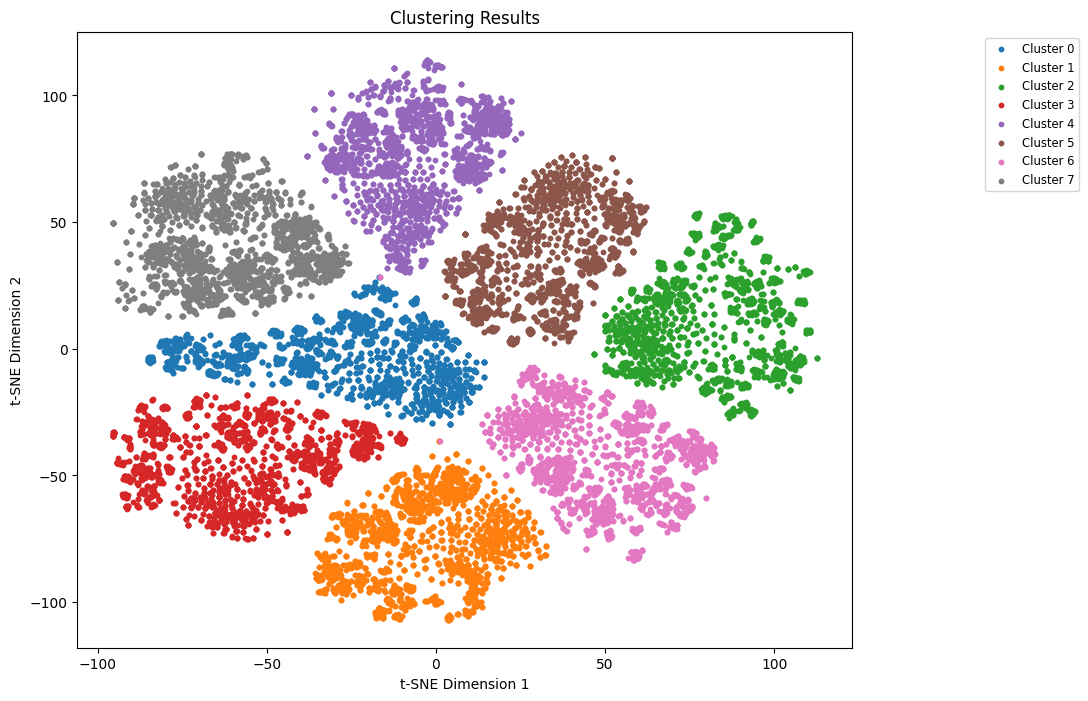

Clustering completed.


In [28]:
# Step 1: Encode a word to embedding vectors using a short sentence transformer
def encode_attributes(attributes, model_name="all-MiniLM-L6-v2"):
    """Encodes a list of attribute names into embedding vectors."""
    model = SentenceTransformer(model_name)
    embeddings = model.encode(attributes)
    return embeddings

# Step 2: Generate fake attributes for testing
def generate_fake_attributes(n=20000):
    """Generates fake attribute names for testing."""
    base_words = ["color", "size", "brand", "material", "quality", "durability", "price", "design"]
    attributes = [
        f"{random.choice(base_words)}_{random.randint(1, 10000)}" for _ in range(n)
    ]
    return attributes

# Step 3: Perform clustering based on cosine similarity
def cluster_attributes(embeddings, num_clusters=8):
    """Clusters attributes using KMeans and cosine similarity."""
    # KMeans doesn't directly support cosine similarity, so normalize the embeddings
    normalized_embeddings = embeddings / np.linalg.norm(embeddings, axis=1, keepdims=True)
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(normalized_embeddings)
    return cluster_labels

# Step 4: Assign membership numbers and test
if __name__ == "__main__":
    # Generate fake attributes
    fake_attributes = generate_fake_attributes(n=20000)
    print(f"Generated {len(fake_attributes)} fake attributes.")

    # Encode attributes to embedding vectors
    print("Encoding attributes...")
    embeddings = encode_attributes(fake_attributes)

    # Perform clustering
    print("Clustering attributes...")
    cluster_labels = cluster_attributes(embeddings, num_clusters=8)

    # Display results: 10 sample cases
    for i in range(10):
        print(f"Attribute: {fake_attributes[i]} -> Cluster: {cluster_labels[i]}")

    print("Clustering completed.")

# Step 5: Plot the clustering results with TSNE
if __name__ == "__main__":

    # Reduce dimensionality for visualization using t-SNE
    tsne = TSNE(n_components=2, random_state=42)
    embeddings_2d = tsne.fit_transform(embeddings)

    # Plot the clustering results
    plt.figure(figsize=(10, 8))
    for i in range(8):  # Assuming 8 clusters
        plt.scatter(embeddings_2d[cluster_labels == i, 0], embeddings_2d[cluster_labels == i, 1], label=f"Cluster {i}", s=10)

    plt.xlabel("t-SNE Dimension 1")
    plt.ylabel("t-SNE Dimension 2")
    plt.title("Clustering Results")
    plt.legend(loc='upper right', bbox_to_anchor=(1.3,1), fontsize='small') #adjust legend position and font size
    plt.show()

    print("Clustering completed.")